# Lending Tree Loan Analysis

This notebook is an analysis of 2 years worth of loan data from Lending Tree from 2016 - 2017. There are 8 datasets total (1 for each quarter).

Exploratory Data Analysis is performed, along with preprocessing/cleaning and some visualization. This set is very large, so a few features/correlations were explored, but there are many more to dig into. 

In [1]:
# Import Librarires
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import glob

In [2]:
pd.set_option('display.max_rows', 200)
sns.set_style('whitegrid')

In [3]:
data = pd.read_csv('data/2016Q1.csv')

# Import all 8 datasets - Don't load all 8 unless you have the processing power. 
#data = pd.concat([pd.read_csv(f) for f in glob.glob('data/*.csv')], ignore_index = True)


/Users/nate/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,0,75910406,NaN,8400,8400,8400.0,36 months,9.75%,270.06,B,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1,75768614,NaN,12000,12000,12000.0,36 months,7.89%,375.43,A,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,2,75650131,NaN,28000,28000,28000.0,36 months,7.39%,869.57,A,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,3,76084025,NaN,10000,10000,10000.0,36 months,13.67%,340.18,C,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,4,76003313,NaN,20000,20000,20000.0,36 months,11.99%,664.20,C,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,133887.000000,1.338870e+05,0.0,133887.000000,133887.000000,133887.000000,133887.000000,1.338870e+05,133870.000000,133887.000000,...,1192.0,1192.000000,1192.0,1192.000000,931.000000,1192.000000,1192.000000,3189.000000,3189.000000,3189.000000
mean,66943.000000,7.208895e+07,NaN,15589.394041,15589.394041,15581.984023,460.857775,8.046397e+04,19.547033,0.343476,...,3.0,146.267584,3.0,13.901007,423.585274,11114.788851,184.775260,5374.464744,47.729276,14.100659
std,38649.992083,3.056179e+06,NaN,8858.198349,8858.198349,8856.454888,261.614677,7.808478e+04,9.966931,0.908581,...,0.0,115.338468,0.0,9.690349,338.206811,6683.390778,194.782213,3729.808315,5.909065,7.268741
min,0.000000,5.612100e+04,NaN,1000.000000,1000.000000,775.000000,30.120000,0.000000e+00,-1.000000,0.000000,...,3.0,5.110000,3.0,0.000000,15.330000,475.920000,0.010000,200.000000,20.000000,0.000000
25%,33471.500000,7.010144e+07,NaN,8400.000000,8400.000000,8400.000000,265.680000,4.950000e+04,12.640000,0.000000,...,3.0,57.610000,3.0,6.000000,164.610000,5635.722500,40.015000,2435.000000,45.000000,10.000000
50%,66943.000000,7.205219e+07,NaN,14400.000000,14400.000000,14400.000000,398.520000,6.800000e+04,18.760000,0.000000,...,3.0,111.360000,3.0,15.000000,320.760000,10098.635000,120.545000,4553.860000,45.000000,14.000000
75%,100414.500000,7.452260e+07,NaN,21000.000000,21000.000000,21000.000000,613.910000,9.500800e+04,25.770000,0.000000,...,3.0,205.435000,3.0,23.000000,587.625000,15536.700000,267.107500,7375.000000,50.000000,18.000000
max,133886.000000,7.615383e+07,NaN,40000.000000,40000.000000,40000.000000,1536.950000,9.550000e+06,999.000000,22.000000,...,3.0,650.090000,3.0,32.000000,1889.970000,32348.480000,1407.860000,23895.910000,90.000000,65.000000


## Dropping Features
There are some features in this dataset that are unable to be used and/or irrelevant. For example, the ID of each loan, or the zip codes being incomplete due to protection of personal information, etc. Some features were also empty for every single observation, such as the secondary applicant features. 

In [6]:
drop_cols = ['Unnamed: 0', 'id', 'member_id', 'url', 'desc', 'zip_code', 'revol_bal_joint', 'sec_app_fico_range_low',
             'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc',
             'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 
             'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 
             'sec_app_mths_since_last_major_derog']

data.drop(columns=drop_cols, inplace=True)

## Cleaning Features
Obtaining a list of columns that contain at least 1 NaN/Missing Value. Once this list is known, the process of replacing/filling those values via the appropriate method can begin. 

In [7]:
data.columns[data.isna().any()].tolist()

['emp_title',
 'emp_length',
 'title',
 'dti',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'revol_util',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_tl_120dpd_2m',
 'percent_bc_gt_75',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'deferral_term',
 'hardship_amount',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_length',
 'hardship_dpd',
 'hardship_loan_status',
 'orig_projected_additional_accrued_interest',
 

Checking to see if any columns need to be cast as anything other than Object types.

In [8]:
object_types = []

for col in data.columns:
    if data[col].dtype == object:
        object_types.append(col)
        
object_types

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'title',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'verification_status_joint',
 'hardship_flag',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_loan_status',
 'disbursement_method',
 'debt_settlement_flag',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date']

Some Object data types, such as int_rate and revol_util, need to be converted from string percentages to floats. This allows us to compute numerical values. 

In [9]:
convert_to_float = ['int_rate', 'revol_util']

for col in convert_to_float:
    data[col] = np.around(data[col].str.rstrip('%').astype(float), 2)

Employment Length should be converted to numerical values so that the mean can be used for any future NaN/Missing Values.

In [10]:
data['emp_length'] = data['emp_length'].replace({'10+ years': 10,
                                                '< 1 year': 0,
                                                '1 year': 1,
                                                '2 years': 2,
                                                '3 years': 3,
                                                '4 years': 4,
                                                '5 years': 5,
                                                '6 years': 6,
                                                '7 years': 7,
                                                '8 years': 8,
                                                '9 years': 9})

A portion of these observations are for Joint Applicants. In order to ensure that we properly handle missing data for them (and for ease of access), they've been put into a separate variable. 

In [11]:
joint_apps = data[data['application_type'] == 'Joint App']

## Imputing Zeros & Means for NaN/Missing Values
Created lists for columns in which NaN/Missing Values will be replaced with either the column mean or zeros. 

In [12]:
impute_mean_cols = ['emp_length', 'dti', 'revol_util']

impute_zero_cols = ['inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog',
               'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 
               'il_util', 'open_rv_12m', 'open_rv_24m','max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 
               'inq_last_12m', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mths_since_recent_bc', 
               'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
               'num_tl_120dpd_2m', 'percent_bc_gt_75']

In [13]:
for col in impute_zero_cols:
    data[[col]] = data[[col]].fillna(0)

## We can use the imputer from sklearn if we want to as well. 

#from sklearn.impute import SimpleImputer
# impute_zero = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 0)
# for col in impute_zero_cols:
#     index = data.columns.get_loc(col)
#     impute_zero = impute_zero.fit(data[[col]])
#     data[col] = impute_zero.transform(data[[col]]).ravel()

In [14]:
for col in impute_mean_cols:
    data[[col]] = data[[col]].fillna(np.around(data[[col]].mean(), 2))

## We can use the imputer from sklearn if we want to as well. 
# impute_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
# for col in impute_mean_cols:
#     index = data.columns.get_loc(col)
#     impute_mean = impute_mean.fit(data[[col]])
#     data[col] = impute_mean.transform(data[[col]]).ravel()



In [15]:
joint_impute_mean_cols = ['annual_inc_joint', 'dti_joint']

Columns that contain NaN/Missing Values for other data such as Employment Title, can be filled with specific values instead of left blank. 

In [16]:
impute_other_cols = ['emp_title', 'title']

for col in impute_other_cols:
    data[[col]] = data[[col]].fillna('other')

In [17]:
data.columns[data.isna().any()].tolist()

['last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'deferral_term',
 'hardship_amount',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_length',
 'hardship_dpd',
 'hardship_loan_status',
 'orig_projected_additional_accrued_interest',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date',
 'settlement_amount',
 'settlement_percentage',
 'settlement_term']

## Visualization
Exploring the current state of the dataset through means of visualization, starting with a correlation matrix to give an idea of which features may be related. 

For the sake of keeping this notebook a reasonable length, there will be a couple of features/correlations that will be explored. However, there is much more that can be explored here. 

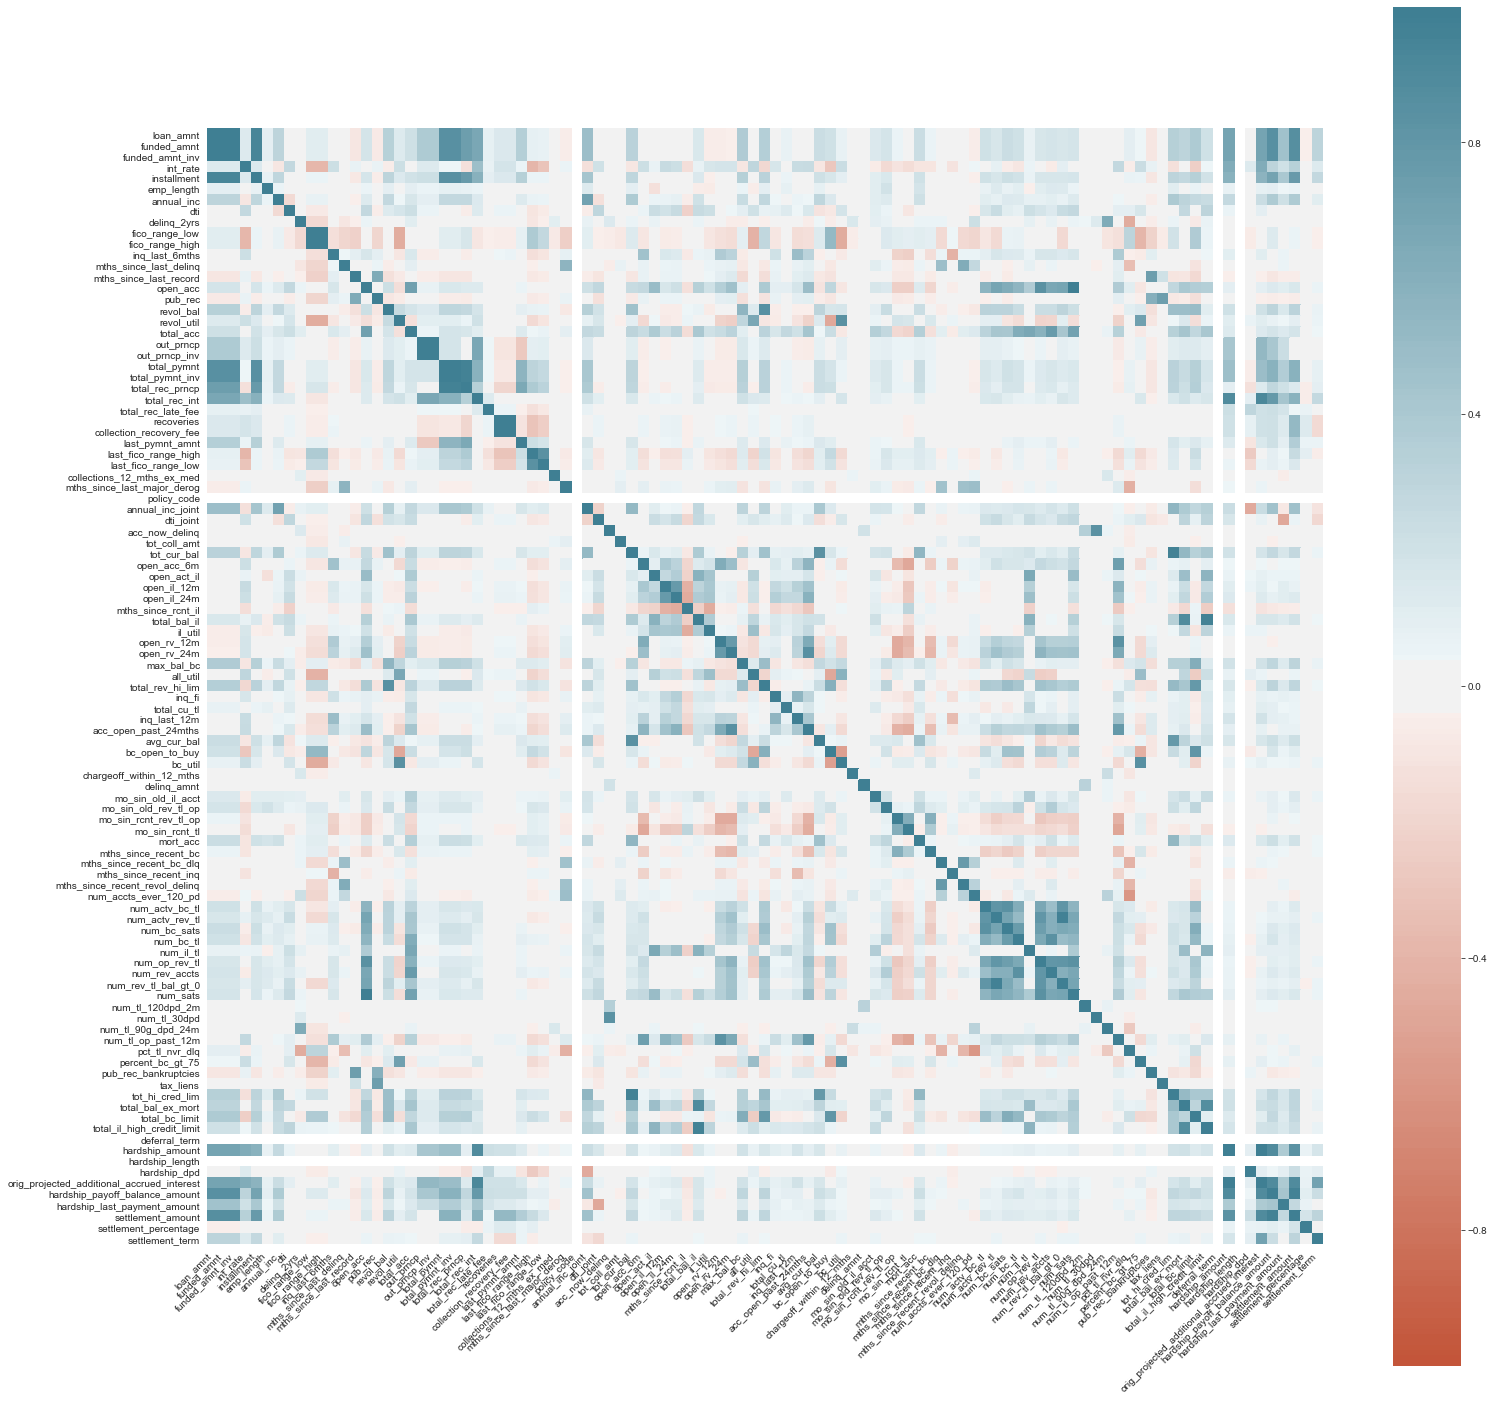

In [18]:
corr = data.corr()
plt.figure(figsize=(25, 25))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Utilization of Revolving Credit

Performing a simple distribution plot on the revolving credit utilization of the customers shows just what one what one would expect. Most of the customers are using approximately 52% of their available credit with a standard deviation of 24%. 

In [19]:
corr['revol_util'].sort_values(ascending=False)

revol_util                                    1.000000
bc_util                                       0.838515
percent_bc_gt_75                              0.724544
all_util                                      0.673397
max_bal_bc                                    0.292134
revol_bal                                     0.253990
int_rate                                      0.219171
total_rec_int                                 0.204557
mo_sin_rcnt_rev_tl_op                         0.184313
dti                                           0.175881
dti_joint                                     0.161167
mo_sin_rcnt_tl                                0.160141
mths_since_recent_bc                          0.150612
total_bal_ex_mort                             0.142805
avg_cur_bal                                   0.139201
installment                                   0.135343
funded_amnt                                   0.125180
loan_amnt                                     0.125180
funded_amn

In [20]:
data['revol_util'].describe()

count    133887.000000
mean         51.929075
std          24.202334
min           0.000000
25%          33.800000
50%          51.900000
75%          70.500000
max         172.000000
Name: revol_util, dtype: float64

Text(0.5, 0, 'Revolving Credit Utilization (%)')

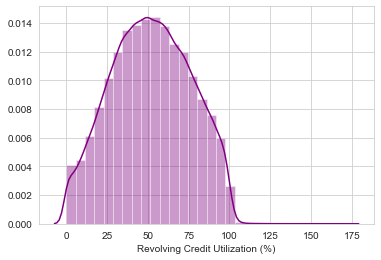

In [21]:
ax = sns.distplot(data['revol_util'], bins=30, color='purple')
ax.set_xlabel('Revolving Credit Utilization (%)')

There is a slight correlation between Revolving Credit Utilization and the Interest Rate that is assigned to the loan. The following plot shows that in a lot of cases, a higher your Revolving Credit Utilization results in a higher Interest Rate. 

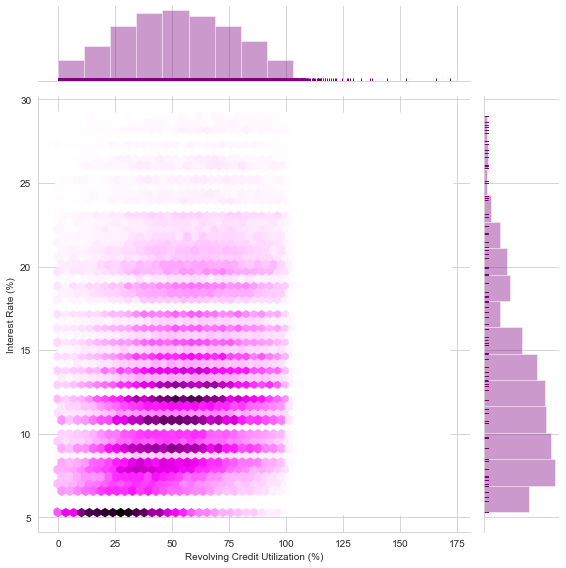

In [22]:
sns.jointplot(x='revol_util', y='int_rate', data=data, kind='hex', height=8, color='purple',
             marginal_kws=dict(bins=15, rug=True)).set_axis_labels('Revolving Credit Utilization (%)',
                                                                   'Interest Rate (%)')

A negative correlation between the Revolving Credit Utilization and the customer's FICO score (high end of the range) is explored. This shows that lower credit utilization rates result in a higher FICO score, which may be important factors in other features of a loan offer, such as interest rate, loan amount, loan term, etc. 

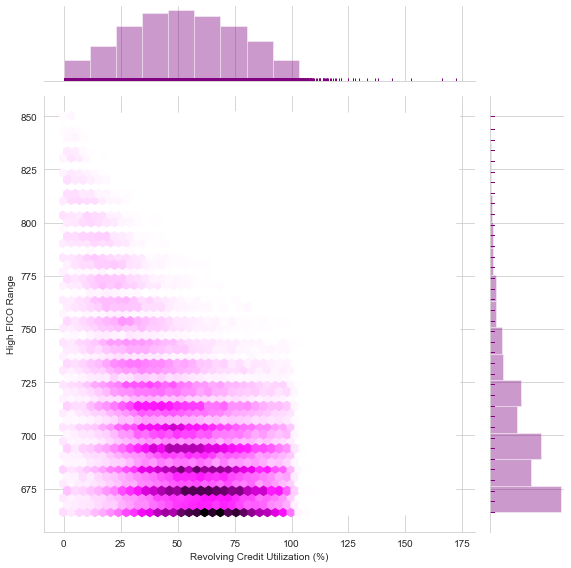

In [23]:
sns.jointplot(x='revol_util', y='fico_range_high', data=data, kind='hex', height=8, color='purple',
             marginal_kws=dict(bins=15, rug=True)).set_axis_labels('Revolving Credit Utilization (%)',
                                                                   'High FICO Range')

### Loan Amount vs. Other Features
Employment length doesn't seem to be much of a factor at all in regard to the loan amount. However, the term of the loan, either 36 months or 60 months, appears to be related. We can see that higher loan amounts are related with longer loan terms. 

Text(0, 0.5, 'Loan Amount')

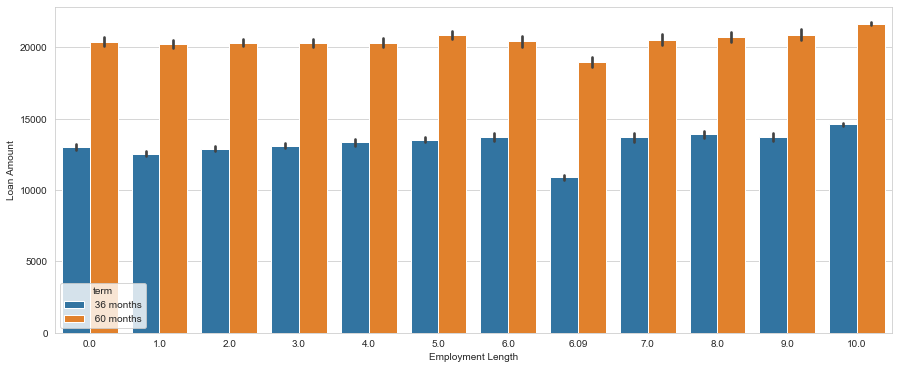

In [24]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='emp_length', y='loan_amnt', data=data, hue='term')
ax.set_xlabel('Employment Length')
ax.set_ylabel('Loan Amount')

This KDE (Kernel Density Estimation) plot shows where Lending Tree's loans are concentrated as they pertain to Interest Rate and Loan Amount. The darker areas are more dense, which means more loans are concentrated in those areas. We can see with the following plot that a sizeable portion of Lending Tree's loans are less than (or equal to) $15,000 with interest rates approximately from 7% - 12%.

<Figure size 1080x288 with 0 Axes>

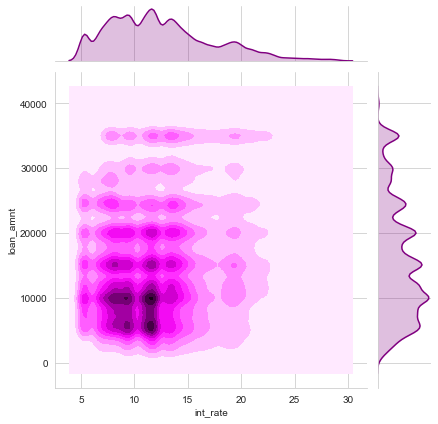

In [25]:
plt.figure(figsize=(15, 4))
sns.jointplot(x='int_rate', y='loan_amnt', data=data, kind='kde', color='purple')

Text(0, 0.5, 'Loan Amount ($)')

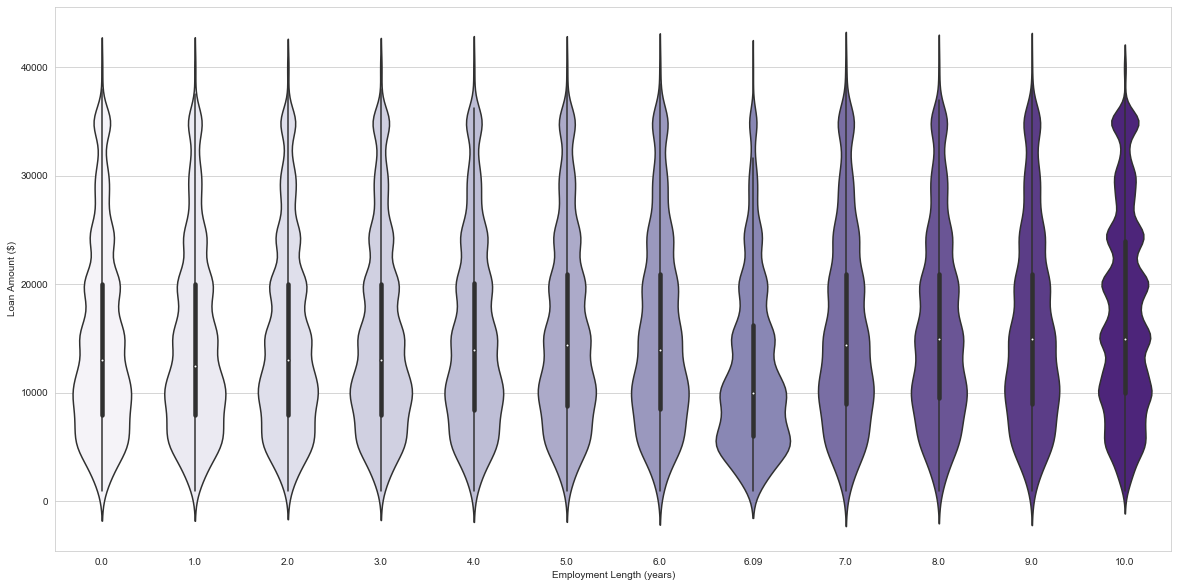

In [26]:
plt.figure(figsize=(20, 10))
sns.violinplot(x='emp_length', y='loan_amnt', data=data, palette='Purples')
plt.xlabel('Employment Length (years)')
plt.ylabel('Loan Amount ($)')

If we relate Employment Length, Loan Grade, and the number of derogatory public records, we can use a heatmap. From what can be seen here, there appears to be a negative correlation between the three features. Customers with low Employlemt Length tend to be classified as lower grade loans due to a tendency of having a number of derogatory marks on their public record. 

Text(115.0, 0.5, 'Employment Length')

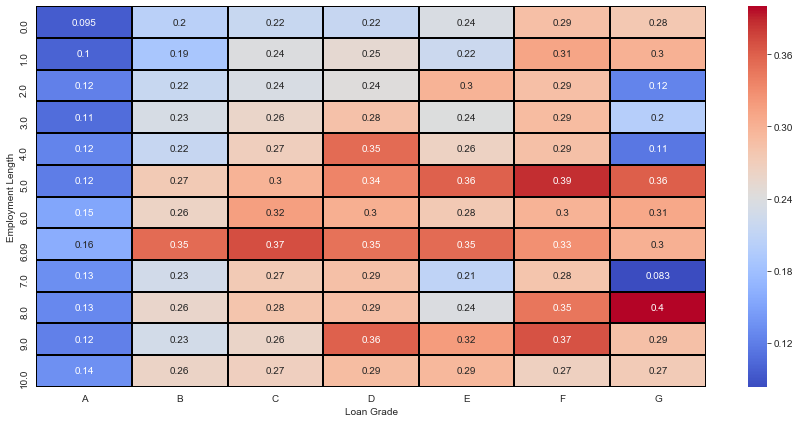

In [27]:
pub_rec_pivot = data.pivot_table(index='emp_length', columns='grade', values='pub_rec')

plt.figure(figsize=(15, 7))
sns.heatmap(pub_rec_pivot, annot=True, cmap='coolwarm', linewidth=1, linecolor='black')
plt.xlabel('Loan Grade')
plt.ylabel('Employment Length')